In [0]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [0]:
# The tech stocks we'll use
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [3]:

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2015-05-11,127.559998,125.629997,127.389999,126.320000,42035800.0,116.417625,APPLE
2015-05-12,126.879997,124.820000,125.599998,125.870003,48160000.0,116.002884,APPLE
2015-05-13,127.190002,125.870003,126.150002,126.010002,34694200.0,116.131927,APPLE
2015-05-14,128.949997,127.160004,127.410004,128.949997,45203500.0,118.841446,APPLE
2015-05-15,129.490005,128.210007,129.070007,128.770004,38208000.0,118.675552,APPLE


# Apple Stock Price Prediction with ARIMA

In [0]:
df_apple = AAPL.filter(['Close'])
train_apple, test_apple = df_apple[0:int(len(df_apple)*0.8)], df_apple[int(len(df_apple)*0.8):]
train_ar_apple = train_apple['Close'].values
test_ar_apple = test_apple['Close'].values

In [14]:
history_apple = [i for i in train_ar_apple]
pred_apple = list()

for i in range(len(test_ar_apple)):
    model = ARIMA(history_apple, order = (7,1,0))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    pred_apple.append(output[0])
    obs = test_ar_apple[i]
    history_apple.append(obs)

rmse = np.sqrt(mean_squared_error(test_ar_apple, pred_apple))
print('Testing Mean Squared Error: %.3f' % rmse)

Testing Mean Squared Error: 6.533


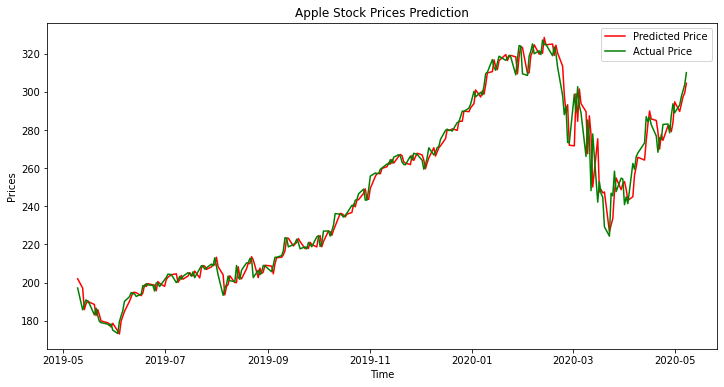

In [16]:
plt.figure(figsize = (12,6))
plt.plot(test_apple.index, pred_apple, color = 'red', label = 'Predicted Price')
plt.plot(test_apple.index, test_apple['Close'], color = 'green', label = 'Actual Price')
plt.title('Apple Stock Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()

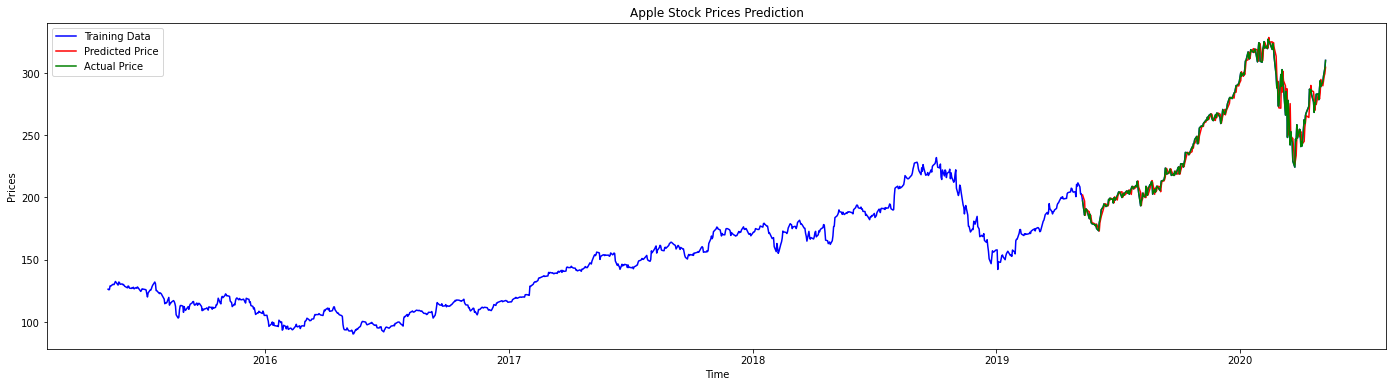

In [17]:
plt.figure(figsize = (24,6))
plt.plot(df_apple['Close'], color = 'blue', label = 'Training Data')
plt.plot(test_apple.index, pred_apple, color = 'red', label = 'Predicted Price')
plt.plot(test_apple.index, test_apple['Close'], color = 'green', label = 'Actual Price')
plt.title('Apple Stock Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()

# Google Stock Price Prediction with ARIMA

In [0]:
df_google = GOOG.filter(['Close'])
train_google, test_google = df_google[0:int(len(df_google)*0.8)], df_google[int(len(df_google)*0.8):]
train_ar_google = train_google['Close'].values
test_ar_google = test_google['Close'].values

In [20]:
history_google = [i for i in train_ar_google]
pred_google = list()

for i in range(len(test_ar_google)):
    model = ARIMA(history_google, order = (7,1,0))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    pred_google.append(output[0])
    obs = test_ar_google[i]
    history_google.append(obs)

rmse = np.sqrt(mean_squared_error(test_ar_google, pred_google))
print('Testing Mean Squared Error: %.3f' % rmse)

Testing Mean Squared Error: 27.100


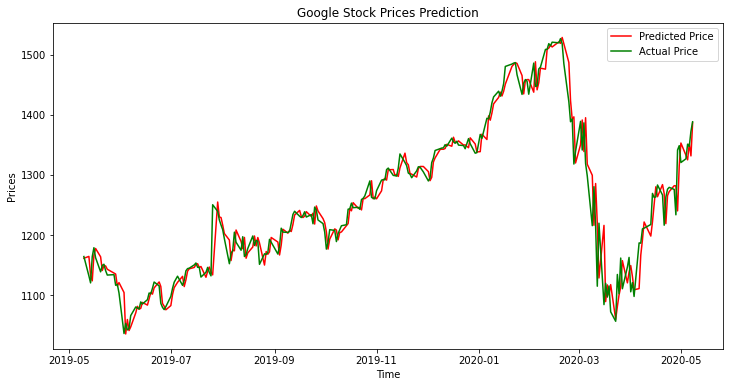

In [21]:
plt.figure(figsize = (12,6))
plt.plot(test_google.index, pred_google, color = 'red', label = 'Predicted Price')
plt.plot(test_google.index, test_google['Close'], color = 'green', label = 'Actual Price')
plt.title('Google Stock Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()

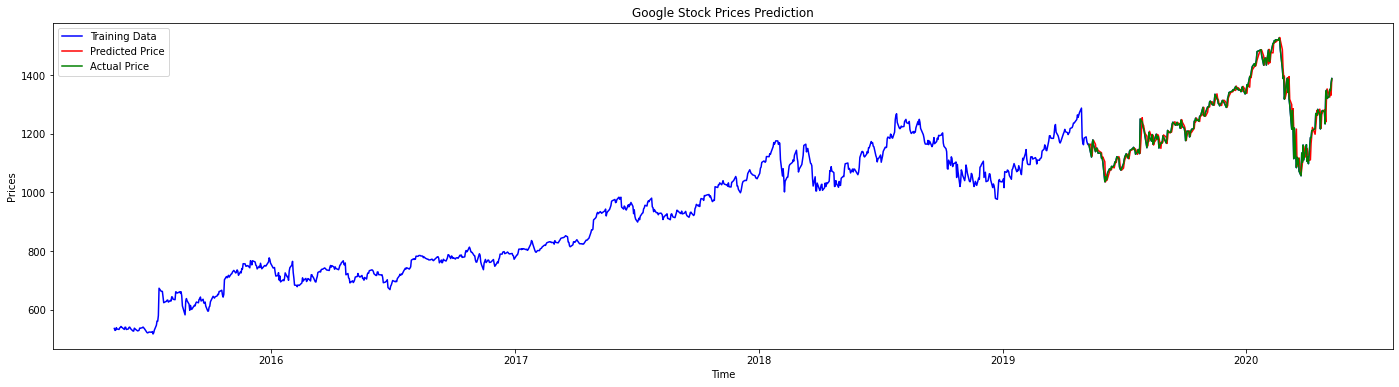

In [22]:
plt.figure(figsize = (24,6))
plt.plot(df_google['Close'], color = 'blue', label = 'Training Data')
plt.plot(test_google.index, pred_google, color = 'red', label = 'Predicted Price')
plt.plot(test_google.index, test_google['Close'], color = 'green', label = 'Actual Price')
plt.title('Google Stock Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()

# Mircosoft Stock Price Prediction

In [0]:
df_microsoft = MSFT.filter(['Close'])
train_microsoft, test_microsoft = df_microsoft[0:int(len(df_microsoft)*0.8)], df_microsoft[int(len(df_microsoft)*0.8):]
train_ar_microsoft = train_microsoft['Close'].values
test_ar_microsoft = test_microsoft['Close'].values

In [26]:
history_microsoft = [i for i in train_ar_microsoft]
pred_microsoft = list()

for i in range(len(test_ar_microsoft)):
    model = ARIMA(history_microsoft, order = (7,1,0))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    pred_microsoft.append(output[0])
    obs = test_ar_microsoft[i]
    history_microsoft.append(obs)

rmse = np.sqrt(mean_squared_error(test_ar_microsoft, pred_microsoft))
print('Testing Mean Squared Error: %.3f' % rmse)

Testing Mean Squared Error: 3.567


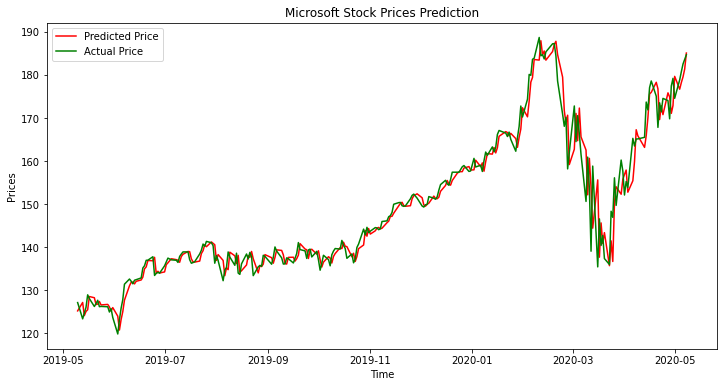

In [27]:
plt.figure(figsize = (12,6))
plt.plot(test_microsoft.index, pred_microsoft, color = 'red', label = 'Predicted Price')
plt.plot(test_microsoft.index, test_microsoft['Close'], color = 'green', label = 'Actual Price')
plt.title('Microsoft Stock Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()

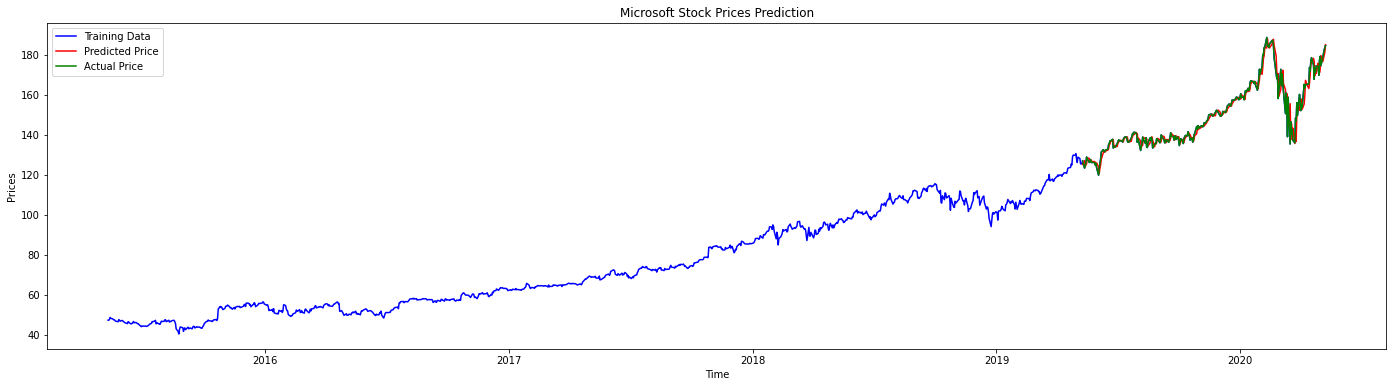

In [28]:
plt.figure(figsize = (24,6))
plt.plot(df_microsoft['Close'], color = 'blue', label = 'Training Data')
plt.plot(test_microsoft.index, pred_microsoft, color = 'red', label = 'Predicted Price')
plt.plot(test_microsoft.index, test_microsoft['Close'], color = 'green', label = 'Actual Price')
plt.title('Microsoft Stock Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()

# Amazon Stock Price Prediction

In [0]:
df_amazon = AMZN.filter(['Close'])
train_amazon, test_amazon = df_amazon[0:int(len(df_amazon)*0.8)], df_amazon[int(len(df_amazon)*0.8):]
train_ar_amazon = train_amazon['Close'].values
test_ar_amazon = test_amazon['Close'].values

In [30]:
history_amazon = [i for i in train_ar_amazon]
pred_amazon = list()

for i in range(len(test_ar_amazon)):
    model = ARIMA(history_amazon, order = (7,1,0))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    pred_amazon.append(output[0])
    obs = test_ar_amazon[i]
    history_amazon.append(obs)

rmse = np.sqrt(mean_squared_error(test_ar_amazon, pred_amazon))
print('Testing Mean Squared Error: %.3f' % rmse)

Testing Mean Squared Error: 38.851


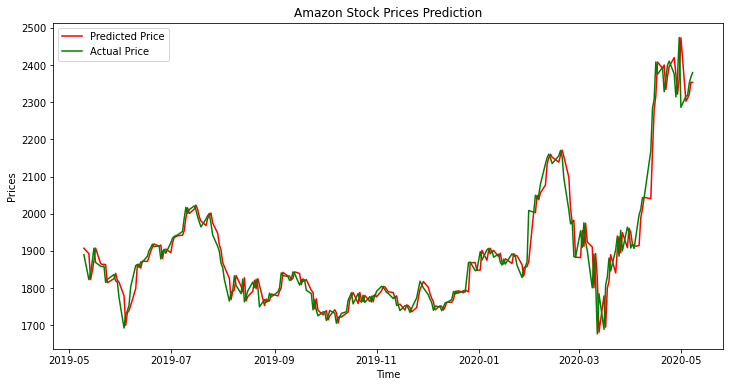

In [32]:
plt.figure(figsize = (12,6))
plt.plot(test_amazon.index, pred_amazon, color = 'red', label = 'Predicted Price')
plt.plot(test_amazon.index, test_amazon['Close'], color = 'green', label = 'Actual Price')
plt.title('Amazon Stock Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()

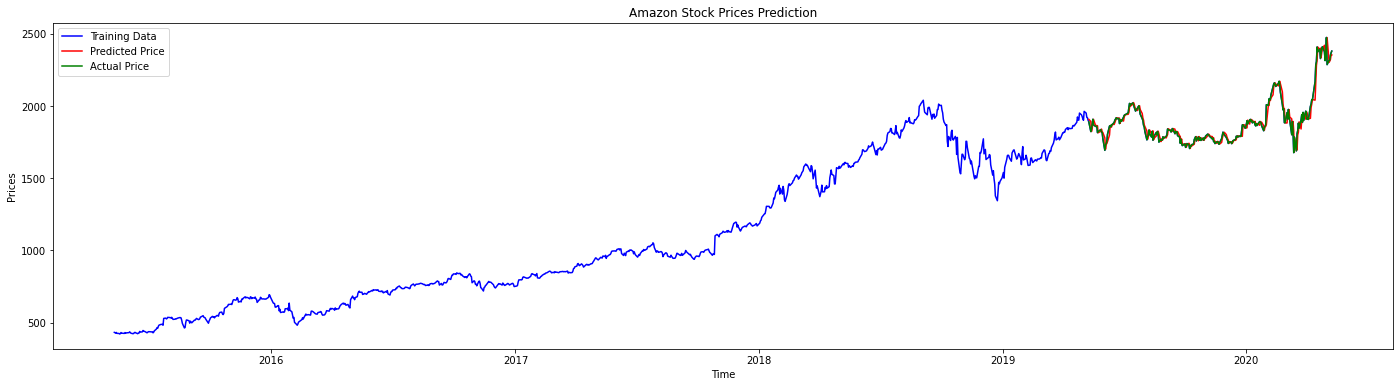

In [33]:
plt.figure(figsize = (24,6))
plt.plot(df_amazon['Close'], color = 'blue', label = 'Training Data')
plt.plot(test_amazon.index, pred_amazon, color = 'red', label = 'Predicted Price')
plt.plot(test_amazon.index, test_amazon['Close'], color = 'green', label = 'Actual Price')
plt.title('Amazon Stock Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()